In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['AppleGothic']
df = pd.read_csv("A_stat_data_112.csv")
print("Data Size:\n", df.shape)
print("Missing Data:\n", df.isnull().sum())

Data Size:
 (1909959, 22)
Missing Data:
 grade                                         0
mission_name                                  0
mission_difficulty                        89773
mission_field                             89773
mission_type                              89773
mission_semester_year                         0
mission_semester                              0
mission_datetime_utc8                         0
mission_status                                0
is_completed                                  0
completed_at_utc8                       1456093
correct_rate                            1455082
answer_duration_sec                     1456339
mission_answer_count                          0
content_indicator_correct_rate          1803921
comprehensive_indicator_correct_rate    1461103
explanation_indicator_correct_rate      1517817
extraction_indicator_correct_rate       1495628
form_indicator_correct_rate             1831158
first_correct_rate                      1436567

In [48]:
columns_needed = [
    'grade', 'mission_difficulty', 'mission_field', 'first_correct_rate',
    'extraction_indicator_correct_rate', 'content_indicator_correct_rate',
    'form_indicator_correct_rate'
]
df_filtered = df[columns_needed]

numeric_columns = [
    'first_correct_rate', 'extraction_indicator_correct_rate',
    'content_indicator_correct_rate', 'form_indicator_correct_rate'
]
categorical_columns = ['grade', 'mission_difficulty', 'mission_field']

for col in numeric_columns:
    df_filtered.loc[:, col] = df_filtered.groupby(['grade', 'mission_difficulty'])[col].transform(
        lambda x: x.fillna(x.mean())
    )

for col in categorical_columns:
    if df_filtered[col].isnull().sum() > 0:
        mode = df_filtered[col].mode()[0]
        df_filtered.loc[:, col] = df_filtered[col].fillna(mode)

print("Missing Data(After filtered):\n", df_filtered.isnull().sum())

df_domain = df_filtered[df_filtered['mission_field'].isin(['文學', '人文史地']) & df_filtered['grade'].isin([7, 8, 9])]
print("\nData Size:\n", df_domain.shape)

Missing Data(After filtered):
 grade                                    0
mission_difficulty                       0
mission_field                            0
first_correct_rate                   89773
extraction_indicator_correct_rate    89773
content_indicator_correct_rate       89773
form_indicator_correct_rate          89773
dtype: int64

Data Size:
 (128143, 7)


In [52]:
difficulty_mapping = {'易': 1, '中': 2, '難': 3}
field_mapping = {'文學':1, '人文史地': 2}
df_domain = df_domain.copy()
df_domain['mission_difficulty'] = df_domain['mission_difficulty'].replace(difficulty_mapping)
df_domain['mission_field'] = df_domain['mission_field'].replace(field_mapping)

print(df_domain.shape)
print(df_domain.dtypes)

(128143, 7)
grade                                  int64
mission_difficulty                     int64
mission_field                          int64
first_correct_rate                   float64
extraction_indicator_correct_rate    float64
content_indicator_correct_rate       float64
form_indicator_correct_rate          float64
dtype: object


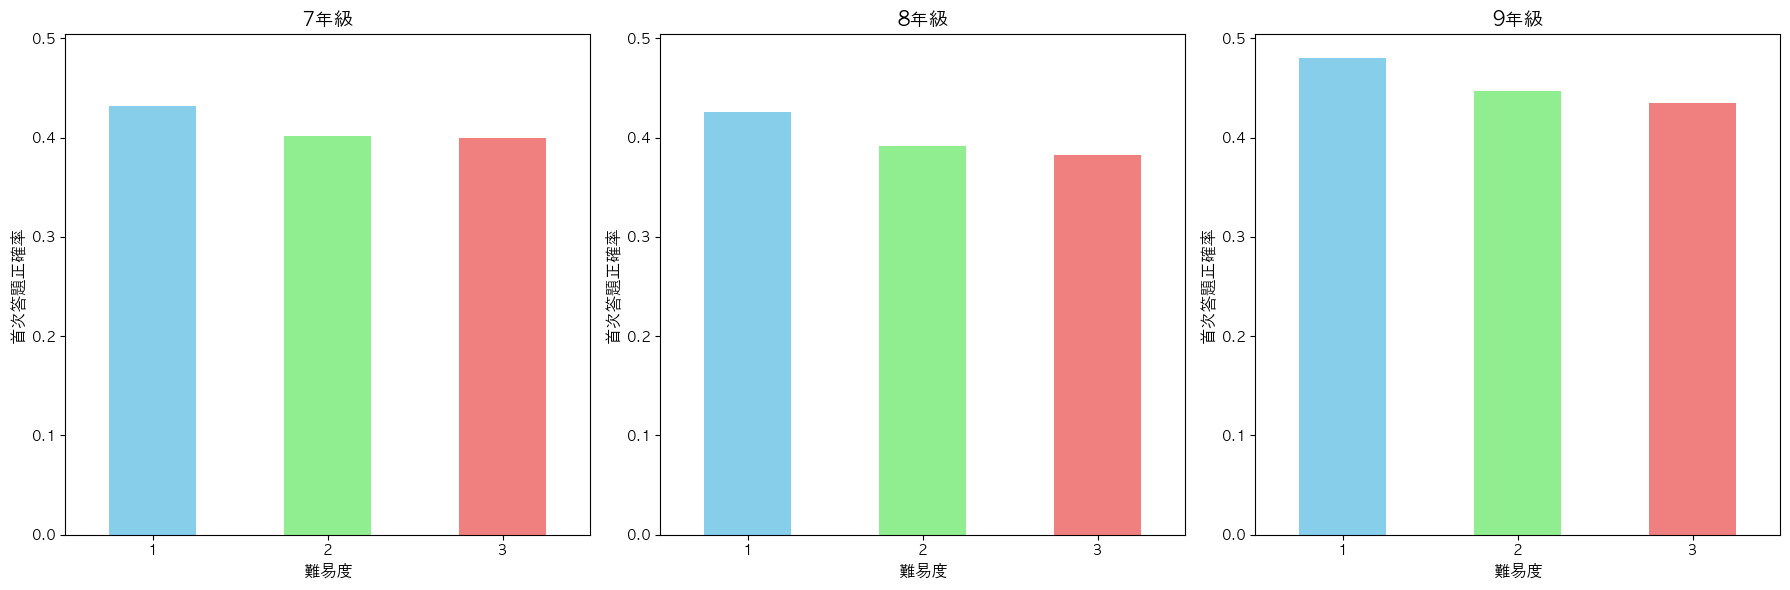

In [69]:
plt.figure(figsize=(18, 6))
difficulty_colors = {'易': 'skyblue', '中': 'lightgreen', '難': 'lightcoral'}
y_max = 0
grades = [7, 8, 9]

for i, grade in enumerate(grades, 1):
    grade_data = df_domain[df_domain['grade'] == grade]
    difficulty_data = grade_data.groupby(['mission_difficulty'])['first_correct_rate'].mean()
    difficulty_data = difficulty_data.reindex([1, 2, 3], fill_value=0)
    
    plt.subplot(1, 3, i)
    ax = difficulty_data.plot(kind='bar', stacked=True, color=difficulty_colors.values(), width=0.5)
    y_max = max(y_max, ax.get_ylim()[1])
    
    plt.title(f'{grade}年級', fontsize=14)
    plt.xlabel('難易度', fontsize=12)
    plt.ylabel('首次答題正確率', fontsize=12)
    plt.xticks(rotation=0)

for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.ylim(0, y_max)
    
plt.tight_layout()
plt.show()

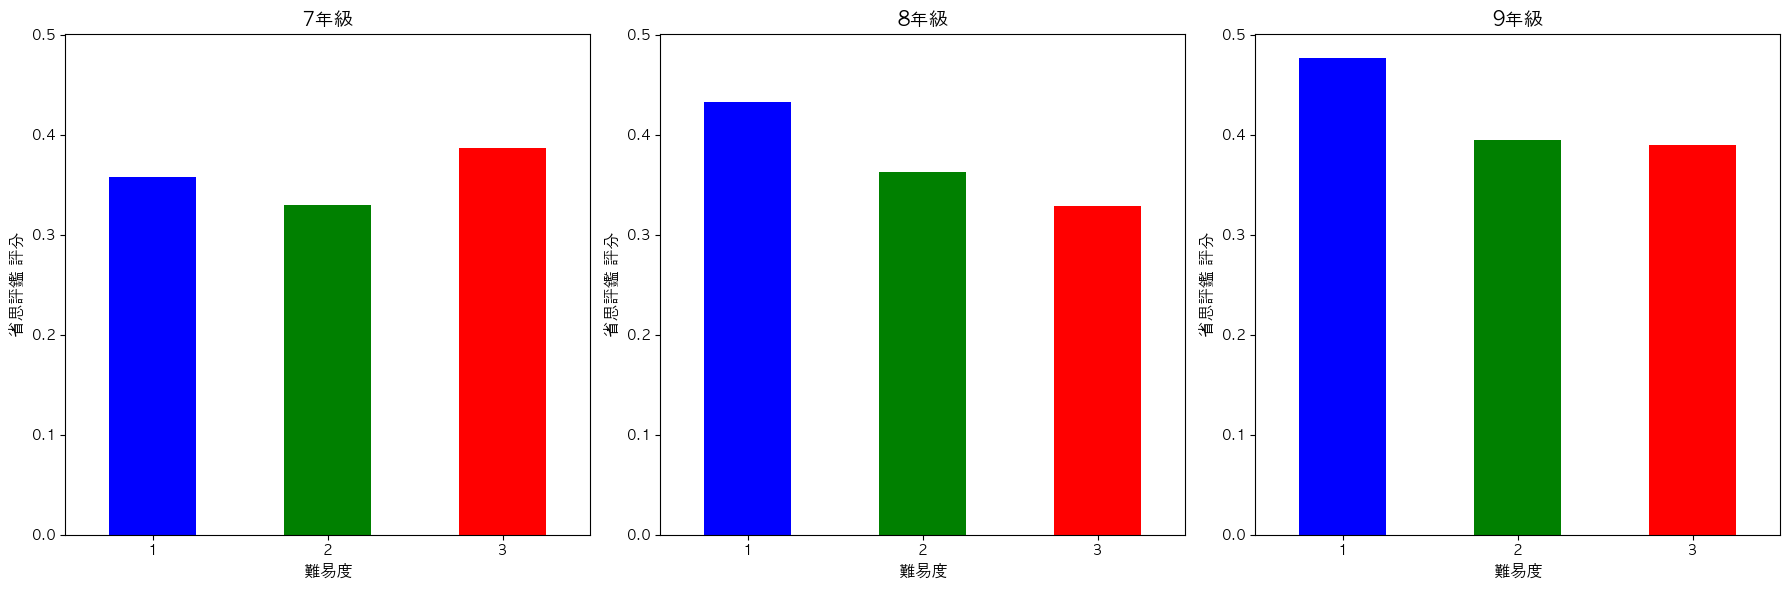

In [87]:
plt.figure(figsize=(18, 6))
difficulty_colors = {'易': 'blue', '中': 'green', '難': 'red'}
y_max = 0
grades = [7, 8, 9]

for i, grade in enumerate(grades, 1):
    grade_data = df_domain[df_domain['grade'] == grade]
    difficulty_data = grade_data.groupby(['mission_difficulty'])['form_indicator_correct_rate'].mean()
    difficulty_data = difficulty_data.reindex([1, 2, 3], fill_value=0)
    
    plt.subplot(1, 3, i)
    ax = difficulty_data.plot(kind='bar', stacked=True, color=difficulty_colors.values(), width=0.5)
    y_max = max(y_max, ax.get_ylim()[1])
    
    plt.title(f'{grade}年級', fontsize=14)
    plt.xlabel('難易度', fontsize=12)
    plt.ylabel('省思評鑑 評分', fontsize=12)
    plt.xticks(rotation=0)

for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.ylim(0, y_max)
    
plt.tight_layout()
plt.show()

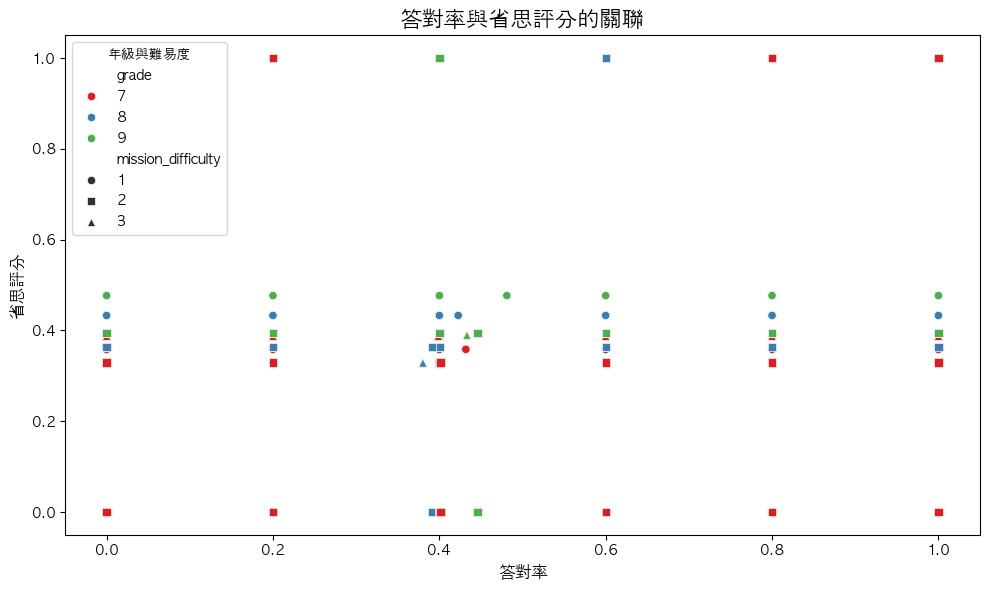

In [90]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_domain, x='first_correct_rate', y='form_indicator_correct_rate', hue='grade', palette='Set1', style='mission_difficulty', markers=['o', 's', '^'])

plt.title('答對率與省思評分的關聯', fontsize=16)
plt.xlabel('答對率', fontsize=12)
plt.ylabel('省思評分', fontsize=12)
plt.legend(title='年級與難易度')

plt.tight_layout()
plt.show()

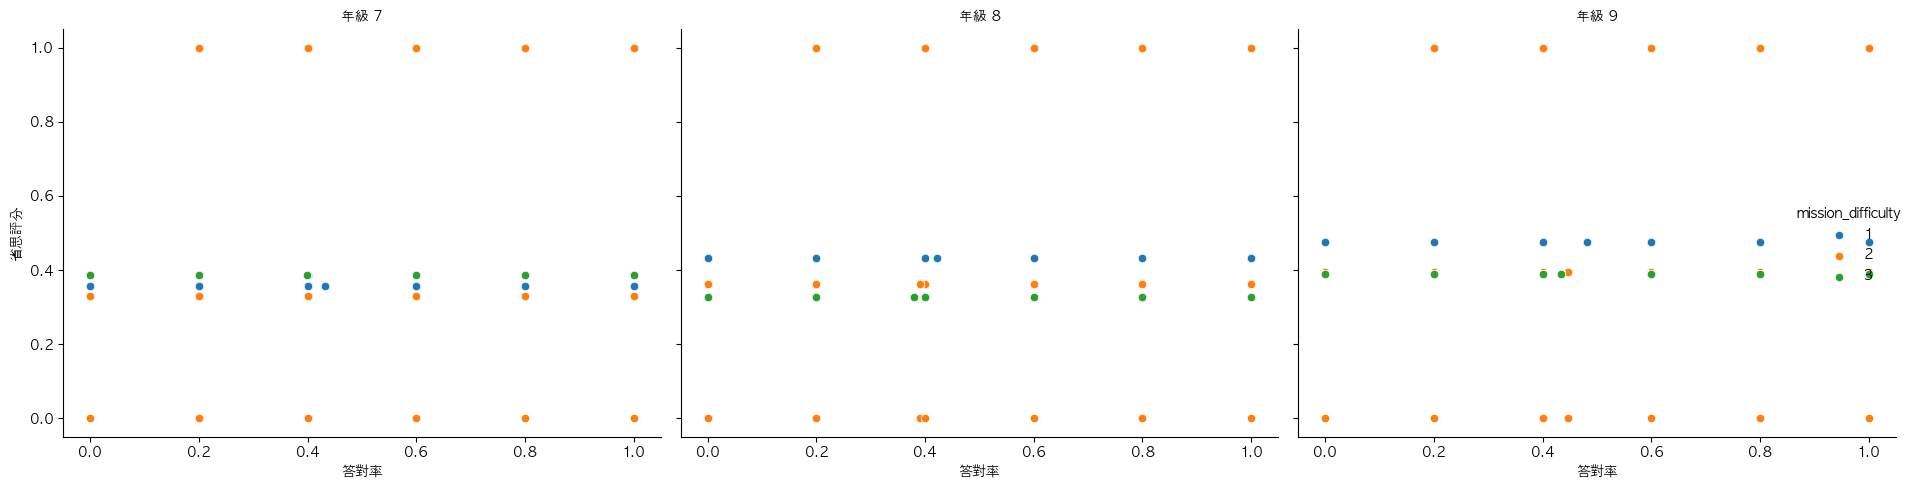

In [77]:
g = sns.FacetGrid(df_domain, col="grade", hue="mission_difficulty", height=5, aspect=1.2)
g.map(sns.scatterplot, 'first_correct_rate', 'form_indicator_correct_rate')
g.set_axis_labels("答對率", "省思評分")
g.set_titles("年級 {col_name}")
g.add_legend()

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

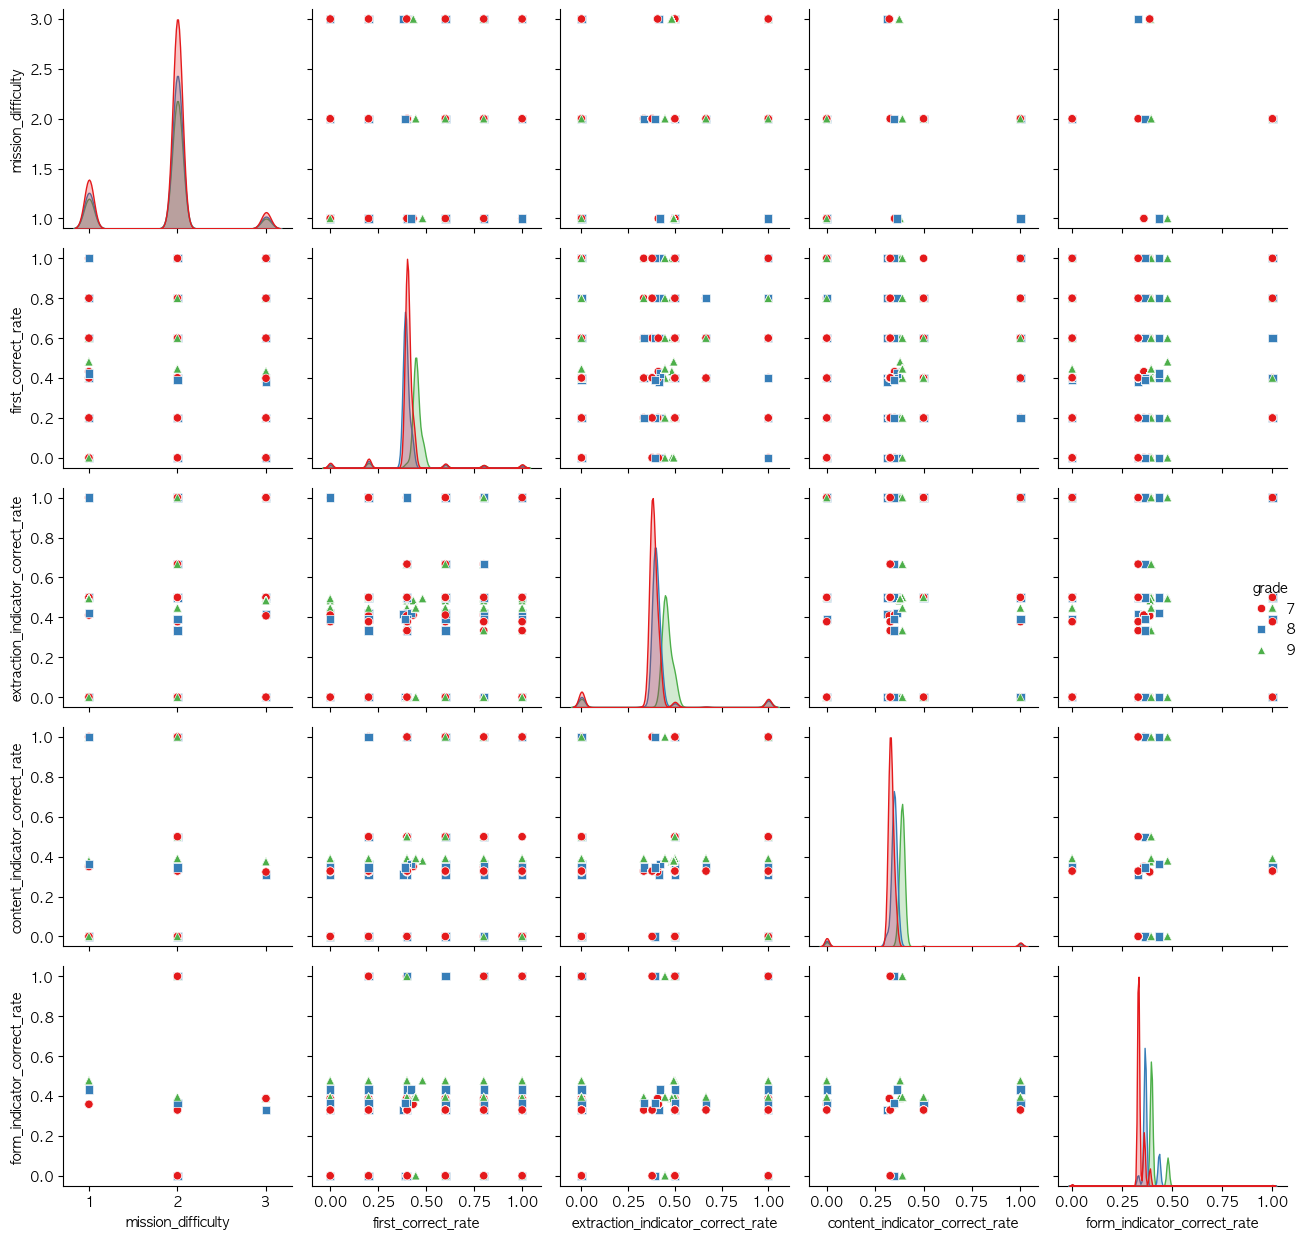

In [85]:
columns_for_pairplot = ['grade', 'mission_difficulty', 'first_correct_rate', 'extraction_indicator_correct_rate', 
                        'content_indicator_correct_rate', 'form_indicator_correct_rate']

df_for_pairplot = df_domain[columns_for_pairplot]

plt.figure(figsize=(10, 8))
sns.pairplot(df_for_pairplot, hue='grade', palette='Set1', markers=['o', 's', '^'])
plt.tight_layout()
plt.show()